# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Reading & Analyzing Dataframe

In [2]:
df = pd.read_csv("../data_given/online_shoppers_intention.csv")
# /data_given/online_shoppers_intention.csv.dvc
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
a = df.VisitorType.unique()
sorted(a)

['New_Visitor', 'Other', 'Returning_Visitor']

In [4]:
def analyze_data(df): 
    print('\n * Size of dataframe: {}\n'.format(df.shape))
    print('* Datatype of columns are:')
    print('{}\n\n'.format(df.info()))
    print('* Column-wise NaNs can be identified as: ')
    print('{}\n'.format(df.isnull().sum()))
    print('Total NaNs:{}'.format(df.isnull().sum().sum()))

analyze_data(df) 


 * Size of dataframe: (12330, 18)

* Datatype of columns are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region       

# 2. Exploratory Data Analysis

## 2.1 Dataset Balance

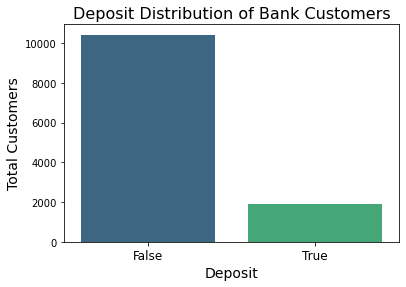

In [5]:
def dataset_balance(df_clean, col):
    fig, ax = plt.subplots()
    sns.countplot(x = col, data = df_clean, palette = 'viridis')
    
    plt.title('Deposit Distribution of Bank Customers', fontsize = 16)
    plt.xlabel('Deposit', fontsize = 14)
    plt.ylabel('Total Customers', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.show()

dataset_balance(df, "Revenue")

In [6]:
df.Revenue = df.Revenue.astype("string")  # Changing from bool type

In [7]:
to_remove = np.random.choice(df[df["Revenue"] == "False"].index, size = 5000, replace=False)   # default 5000 
df = df.drop(df.index[to_remove])

In [8]:
to_add = np.random.choice(df[df['Revenue'] == "True"].index, size = 300, replace=False) 
df_replicate = df[df.index.isin(to_add)]
df = pd.concat([df, df_replicate])

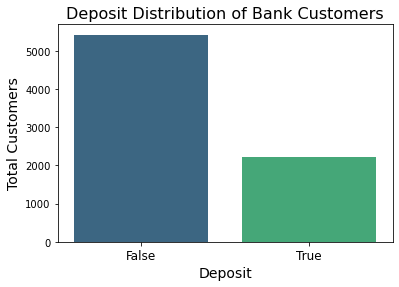

In [9]:
dataset_balance(df, "Revenue")

# 3. Preparing Dataset

## 3.1 Categorical Conversion

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False


In [11]:
df.VisitorType.value_counts()

Returning_Visitor    6433
New_Visitor          1142
Other                  55
Name: VisitorType, dtype: int64

In [12]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000
mean,2.461206,87.283621,0.542333,37.698093,34.213761,1285.930540,0.019683,0.039640,9.135865,0.055544,2.123198,2.378244,3.137090,4.068807
std,3.398048,181.216515,1.286154,145.091733,46.580859,1869.398519,0.045297,0.046023,23.173790,0.189963,0.906437,1.741688,2.396654,4.037524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,217.150000,0.000000,0.012784,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,15.000000,0.000000,0.000000,20.000000,683.040855,0.002439,0.023536,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,101.458333,0.000000,0.000000,40.000000,1560.725000,0.014815,0.044444,6.543521,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2657.318056,16.000000,2256.916667,534.000000,29970.465970,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
# del
a = df.ProductRelated.unique()
sorted(a)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,


In [14]:
col_list = ['Month', 'VisitorType', 'Weekend', 'Revenue']

def convert_cat(df, col_list): 
    df_temp = pd.DataFrame() 
    df_temp = df
#     col_list = col_list
    
    for col in col_list:
        df_temp[col] = df_temp[col].astype('category')
        df_temp[col] = df_temp[col].cat.codes
    
    print('Categorical conversion of columns was completed successfully.')  # Writing to logfile
    
    return df_temp 

df = convert_cat(df, col_list)

Categorical conversion of columns was completed successfully.


In [15]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,0,0


## 3.2 Removing Outliers

### 3.2.1 Finding Outliers

In [16]:
def cols_with_ouliers(df):
    def outlier_cols(x):    
        n = len(x)
        mean_x = np.mean(x)
        sd_x = np.std(x)
        numerator = max(abs(x-mean_x))
        g_calculated = numerator/sd_x
        t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
        g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
        return col if (g_critical) < g_calculated else 0
    
    # Finding columns with outliers
    col_with_outliers = []
    for col in df.columns:
        outlier_col = outlier_cols(df[col])
        col_with_outliers.append(outlier_col)
    
    while (col_with_outliers.count(0)):
        col_with_outliers.remove(0)
    
    print('Columns with outliers are: {}'.format(col_with_outliers) )
    return col_with_outliers


cols_with_outliers = cols_with_ouliers(df) 

Columns with outliers are: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser']


### 3.2.2 Scaling Columns with Outliers 

In [17]:
for col in cols_with_outliers:
    df[col] = (df[col]**(1/3.7))

### 3.2.3 Columns that still possess outliers

In [18]:
cols_with_outliers = cols_with_ouliers(df) 

Columns with outliers are: ['Informational_Duration']


### 3.2.4 Removing scaling for columns that still possess outliers

In [19]:
for col in cols_with_outliers:
    df[col] = df[col]**(3.7)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0.0,0.0,0.0,0.0,1.206034,3.077207,0.000000,0.100000,0.0,0.000000,2,1.206034,1.206034,1,2,2,0,0
2,0.0,0.0,0.0,0.0,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2,1.454517,1.000000,9,3,2,0,0
4,0.0,0.0,0.0,0.0,1.863246,5.703111,0.020000,0.050000,0.0,0.000000,2,1.345711,1.345711,1,4,2,1,0
5,0.0,0.0,0.0,0.0,2.216201,3.902895,0.015789,0.024561,0.0,0.000000,2,1.206034,1.206034,1,3,2,0,0
6,0.0,0.0,0.0,0.0,1.000000,0.000000,0.200000,0.200000,0.0,0.780636,2,1.206034,1.454517,3,3,2,0,0


### 3.2.5 Individually Removing Outliers 

* #### **Declaring Grubbs Test**

In [20]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

* #### **"Informational Duration" Column** 

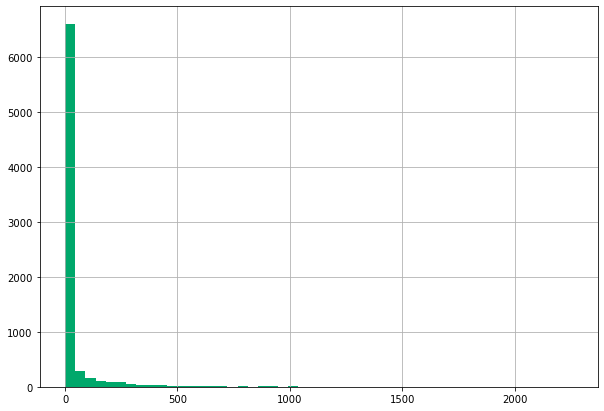

In [21]:
# Plotting histogram
%matplotlib inline
df['Informational_Duration'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [22]:
cut_off = 365
for i in df['Informational_Duration']:
    if i >= cut_off:
        df['Informational_Duration'] = df['Informational_Duration'].replace(i, cut_off)
grubbs_test(df['Informational_Duration'])

Grubbs Calculated Value: 4.339679294195252
Grubbs Critical Value: 4.504858047765237
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



* #### **"ProductRelated" Column**

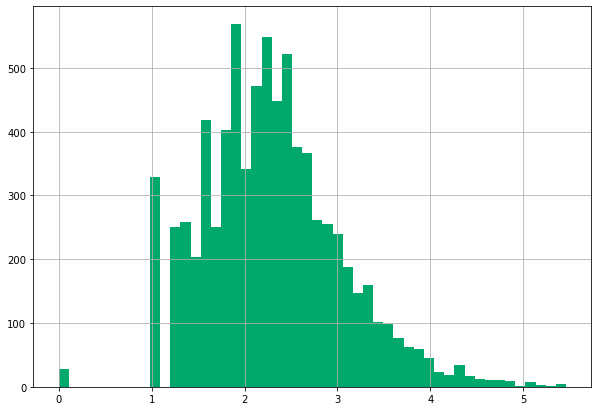

In [23]:
# Plotting histogram
%matplotlib inline
df['ProductRelated'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [24]:
cut_off = 200    
for i in df['ProductRelated']:
    if i >= cut_off:
        df['ProductRelated'] = df['ProductRelated'].replace(i, cut_off)
grubbs_test(df['ProductRelated'])

Grubbs Calculated Value: 4.234342864764626
Grubbs Critical Value: 4.504858047765237
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



* #### "**ProductRelated_Duration" Column**

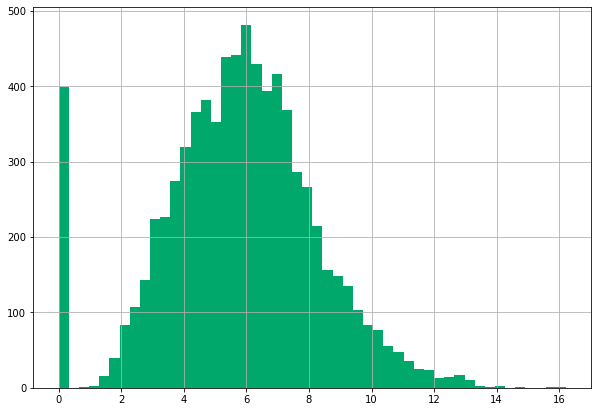

In [25]:
# Plotting histogram
%matplotlib inline
df['ProductRelated_Duration'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [26]:
cut_off = 8100
for i in df['ProductRelated_Duration']:
    if i >= cut_off:
        df['ProductRelated_Duration'] = df['ProductRelated_Duration'].replace(i, cut_off)
grubbs_test(df['ProductRelated_Duration'])

Grubbs Calculated Value: 4.207238135215736
Grubbs Critical Value: 4.504858047765237
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



* #### **"PageValues"Column**

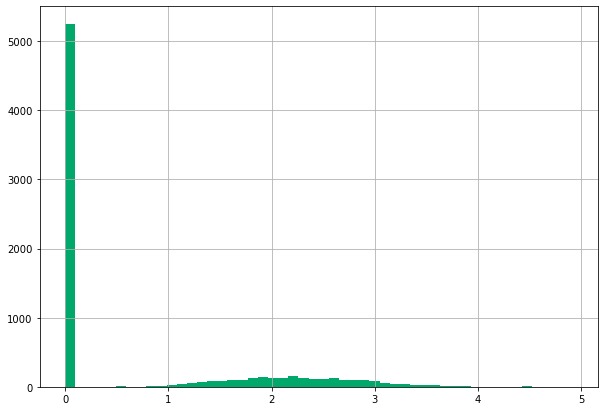

In [27]:
# Plotting histogram
%matplotlib inline
df['PageValues'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [28]:
cut_off = 68
for i in df['PageValues']:
    if i >= cut_off:
        df['PageValues'] = df['PageValues'].replace(i, cut_off)
grubbs_test(df['PageValues'])

Grubbs Calculated Value: 3.815619082807835
Grubbs Critical Value: 4.504858047765237
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



## 4. Splitting Dataset

### 4.1 Analyzing Correllations

In [29]:
def analyze_corr(df, col):
    # fig
    fig = plt.figure(figsize=(12, 12))
    
    # mask
    mask = np.triu(df.corr())
    
    # axes 
    axes = fig.add_axes([0, 0, 1, 1])
    sns.heatmap(df.dropna().corr(), annot=True, mask=mask, square=True, fmt='.2g',
                vmin=-1, vmax=1, center= 0, cmap='viridis', linecolor='white', 
                cbar_kws= {'orientation': 'vertical'}, ax=axes) 
    
    # title
    axes.text(-1, -1.5, 'Correlation', color='black', fontsize=24, fontweight='bold')
    
    plt.show('../visualizations/correlation_heatmap.png')
    
    # Printing correlations
    corr_matrix = df.corr()
    print("The correlation of 'rating' with other columns is: {}".format(corr_matrix[col].sort_values()))

In [30]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0.0,0.0,0.0,0.0,1.206034,3.077207,0.000000,0.100000,0.0,0.000000,2,1.206034,1.206034,1,2,2,0,0
2,0.0,0.0,0.0,0.0,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2,1.454517,1.000000,9,3,2,0,0
4,0.0,0.0,0.0,0.0,1.863246,5.703111,0.020000,0.050000,0.0,0.000000,2,1.345711,1.345711,1,4,2,1,0
5,0.0,0.0,0.0,0.0,2.216201,3.902895,0.015789,0.024561,0.0,0.000000,2,1.206034,1.206034,1,3,2,0,0
6,0.0,0.0,0.0,0.0,1.000000,0.000000,0.200000,0.200000,0.0,0.780636,2,1.206034,1.454517,3,3,2,0,0


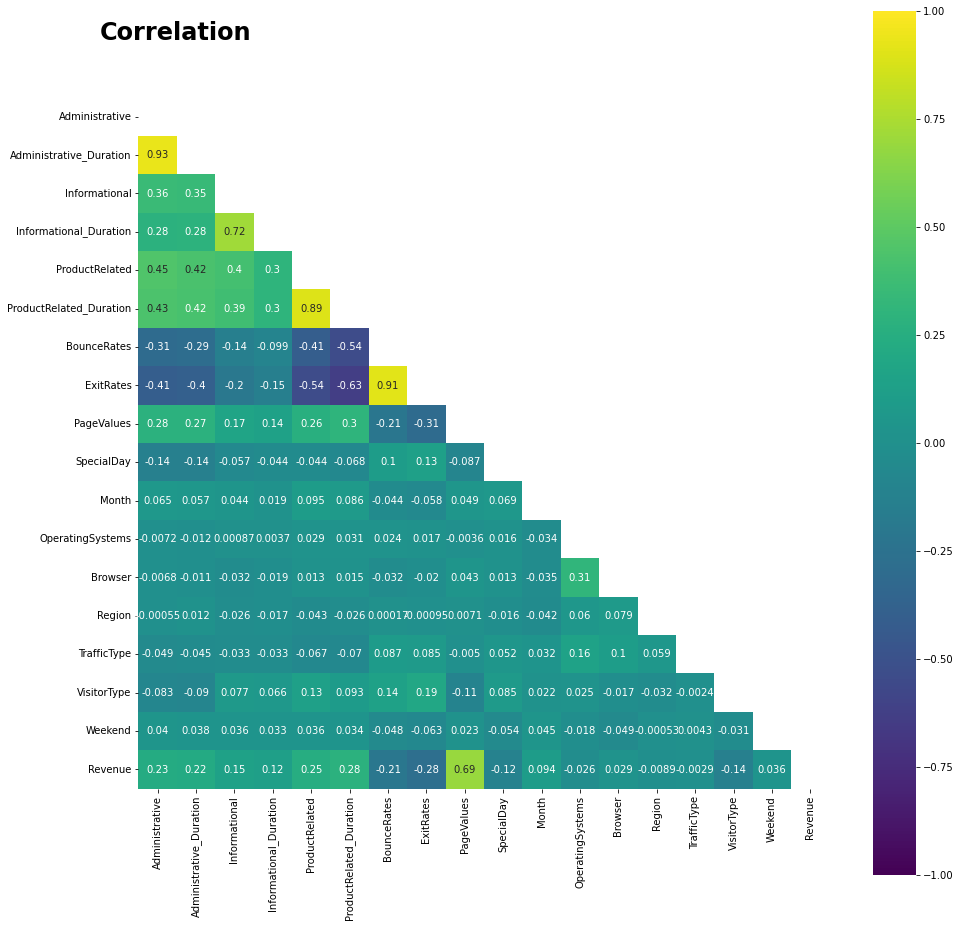

The correlation of 'rating' with other columns is: ExitRates                 -0.280842
BounceRates               -0.207418
VisitorType               -0.140624
SpecialDay                -0.115584
OperatingSystems          -0.025697
Region                    -0.008888
TrafficType               -0.002930
Browser                    0.028926
Weekend                    0.036492
Month                      0.094125
Informational_Duration     0.121022
Informational              0.147227
Administrative_Duration    0.215123
Administrative             0.225947
ProductRelated             0.249874
ProductRelated_Duration    0.276508
PageValues                 0.692114
Revenue                    1.000000
Name: Revenue, dtype: float64


In [31]:
analyze_corr(df, "Revenue")

### 4.2 Train Test Splitting

In [32]:
def split_data(df, col):
    train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 25)

    print(f"\nRows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

    train_labels = train_set[col]
    train_data = train_set.drop(col, axis = 1)

    test_labels = test_set[col]
    test_data = test_set.drop(col, axis = 1)
        
    print(f"\nRows in train data : {len(train_data)}\nRows in train labels: {len(train_labels)}\nRows in test data: {len(test_data)}\nRows in test labels: {len(test_labels)}\n")

    return train_data, train_labels, test_data, test_labels 


In [33]:
train_data, train_labels, test_data, test_labels = split_data(df, "Revenue")


Rows in train set : 6104
Rows in test set: 1526


Rows in train data : 6104
Rows in train labels: 6104
Rows in test data: 1526
Rows in test labels: 1526



In [34]:
# del
test_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

## 5. Modelling 

## 5.1 Comparing Models 

In [35]:
def custom_cmap():
    import matplotlib.colors
    
    norm = matplotlib.colors.Normalize(-1,1)
    colors = [[norm(-1.0), "#e9fcdc"], 
              [norm(-0.6), "#d9f0c9"], 
              [norm( 0.6), "#4CBB17"],
              [norm( 1.0), "#0B6623"]]
    
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    return cmap


def plot_cm(model, cm, accuracy):

    fig = plt.figure(figsize=(7, 5))
    plt.title(model, size = 15)
     
    # Declaring heatmap labels
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    # Plotting heatmap 
    cmap = custom_cmap()
    sns.heatmap(cm, annot=labels, annot_kws={"size": 15}, fmt = '', cmap=cmap)
    
    # Adding figure labels
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(accuracy, 4)))
    
    plt.show('cm_{}'.format(model))   # show figure

    
def evaluate_model(model, test_data, test_labels, model_label):
    
    pred = model.predict(test_data)
    accuracy = accuracy_score(test_labels, pred)
    cm = confusion_matrix(test_labels, pred)
    
    if accuracy > 0.90:    
        plot_cm(model_label, cm, accuracy)
    return accuracy

    
def compare_models(train_data, train_labels, test_data, test_labels):
    
    model_comparison = pd.DataFrame()
    model_names = [ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, 
                   GradientBoostingClassifier, RandomForestClassifier, DecisionTreeClassifier,
                   XGBClassifier, CatBoostClassifier, LGBMClassifier]
    
    
    model_labels = ["etc", "abc", "bc", "gbc", "rfc", "dtc", "xgb", "cbc", "lgbm"]
    i = 0
    
    for model_name in model_names:
        
        model_label = model_labels[i]
        i += 1   
        model = model_name()   # learning_rate does not work here
        model.fit(train_data, train_labels)
                
        accuracy = evaluate_model(model, test_data, test_labels, model_label)

        model_comparison = model_comparison.append({'model_name': model_name, 
                                                    'Accuracy': accuracy}, ignore_index = True)
    
    model_comparison.sort_values(by = ['Accuracy'], ascending = False, inplace = True ) 
    
    model_comparison.reset_index(drop = True)

    return model_comparison

In [36]:
model_comparison = compare_models(train_data, train_labels, test_data, test_labels)

/home/nimai/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:42:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.022304
0:	learn: 0.6687736	total: 59.5ms	remaining: 59.5s
1:	learn: 0.6512603	total: 63.2ms	remaining: 31.5s
2:	learn: 0.6341767	total: 67.1ms	remaining: 22.3s
3:	learn: 0.6183044	total: 71.3ms	remaining: 17.8s
4:	learn: 0.6007797	total: 75.7ms	remaining: 15.1s
5:	learn: 0.5839050	total: 79.9ms	remaining: 13.2s
6:	learn: 0.5666269	total: 84.3ms	remaining: 12s
7:	learn: 0.5543773	total: 88.7ms	remaining: 11s
8:	learn: 0.5419770	total: 93.1ms	remaining: 10.3s
9:	learn: 0.5311207	total: 97.4ms	remaining: 9.64s
10:	learn: 0.5210873	total: 102ms	remaining: 9.14s
11:	learn: 0.5121345	total: 106ms	remaining: 8.73s
12:	learn: 0.5003739	total: 110ms	remaining: 8.38s
13:	learn: 0.4913075	total: 115ms	remaining: 8.08s
14:	lear

171:	learn: 0.2723839	total: 592ms	remaining: 2.85s
172:	learn: 0.2720599	total: 595ms	remaining: 2.84s
173:	learn: 0.2717066	total: 598ms	remaining: 2.84s
174:	learn: 0.2714562	total: 601ms	remaining: 2.83s
175:	learn: 0.2711567	total: 604ms	remaining: 2.83s
176:	learn: 0.2710345	total: 607ms	remaining: 2.82s
177:	learn: 0.2707943	total: 610ms	remaining: 2.82s
178:	learn: 0.2704844	total: 613ms	remaining: 2.81s
179:	learn: 0.2701926	total: 616ms	remaining: 2.8s
180:	learn: 0.2698830	total: 618ms	remaining: 2.8s
181:	learn: 0.2696683	total: 621ms	remaining: 2.79s
182:	learn: 0.2695024	total: 624ms	remaining: 2.79s
183:	learn: 0.2692946	total: 627ms	remaining: 2.78s
184:	learn: 0.2690573	total: 629ms	remaining: 2.77s
185:	learn: 0.2688947	total: 632ms	remaining: 2.77s
186:	learn: 0.2686715	total: 635ms	remaining: 2.76s
187:	learn: 0.2684646	total: 638ms	remaining: 2.75s
188:	learn: 0.2683308	total: 641ms	remaining: 2.75s
189:	learn: 0.2679671	total: 643ms	remaining: 2.74s
190:	learn: 0.

380:	learn: 0.2337853	total: 1.19s	remaining: 1.93s
381:	learn: 0.2337077	total: 1.19s	remaining: 1.92s
382:	learn: 0.2334173	total: 1.19s	remaining: 1.92s
383:	learn: 0.2332242	total: 1.2s	remaining: 1.92s
384:	learn: 0.2330072	total: 1.2s	remaining: 1.91s
385:	learn: 0.2328755	total: 1.2s	remaining: 1.91s
386:	learn: 0.2326653	total: 1.2s	remaining: 1.91s
387:	learn: 0.2324800	total: 1.21s	remaining: 1.9s
388:	learn: 0.2323199	total: 1.21s	remaining: 1.9s
389:	learn: 0.2322215	total: 1.21s	remaining: 1.9s
390:	learn: 0.2320787	total: 1.22s	remaining: 1.89s
391:	learn: 0.2320123	total: 1.22s	remaining: 1.89s
392:	learn: 0.2318616	total: 1.22s	remaining: 1.89s
393:	learn: 0.2317130	total: 1.22s	remaining: 1.88s
394:	learn: 0.2316354	total: 1.23s	remaining: 1.88s
395:	learn: 0.2315154	total: 1.23s	remaining: 1.88s
396:	learn: 0.2313219	total: 1.23s	remaining: 1.87s
397:	learn: 0.2312006	total: 1.24s	remaining: 1.87s
398:	learn: 0.2310958	total: 1.24s	remaining: 1.86s
399:	learn: 0.23091

588:	learn: 0.2020640	total: 1.78s	remaining: 1.24s
589:	learn: 0.2017916	total: 1.78s	remaining: 1.24s
590:	learn: 0.2016101	total: 1.79s	remaining: 1.24s
591:	learn: 0.2015026	total: 1.79s	remaining: 1.23s
592:	learn: 0.2013683	total: 1.79s	remaining: 1.23s
593:	learn: 0.2012085	total: 1.8s	remaining: 1.23s
594:	learn: 0.2010811	total: 1.8s	remaining: 1.23s
595:	learn: 0.2009446	total: 1.8s	remaining: 1.22s
596:	learn: 0.2007903	total: 1.8s	remaining: 1.22s
597:	learn: 0.2006409	total: 1.81s	remaining: 1.22s
598:	learn: 0.2005408	total: 1.81s	remaining: 1.21s
599:	learn: 0.2003608	total: 1.81s	remaining: 1.21s
600:	learn: 0.2002765	total: 1.82s	remaining: 1.21s
601:	learn: 0.2001612	total: 1.82s	remaining: 1.2s
602:	learn: 0.2000760	total: 1.82s	remaining: 1.2s
603:	learn: 0.1999076	total: 1.83s	remaining: 1.2s
604:	learn: 0.1998273	total: 1.83s	remaining: 1.2s
605:	learn: 0.1997487	total: 1.83s	remaining: 1.19s
606:	learn: 0.1995987	total: 1.84s	remaining: 1.19s
607:	learn: 0.199460

789:	learn: 0.1771767	total: 2.38s	remaining: 632ms
790:	learn: 0.1770785	total: 2.38s	remaining: 629ms
791:	learn: 0.1769830	total: 2.38s	remaining: 626ms
792:	learn: 0.1768564	total: 2.39s	remaining: 623ms
793:	learn: 0.1767856	total: 2.39s	remaining: 620ms
794:	learn: 0.1766610	total: 2.39s	remaining: 617ms
795:	learn: 0.1765585	total: 2.4s	remaining: 614ms
796:	learn: 0.1764666	total: 2.4s	remaining: 611ms
797:	learn: 0.1763408	total: 2.4s	remaining: 608ms
798:	learn: 0.1762931	total: 2.4s	remaining: 605ms
799:	learn: 0.1762226	total: 2.41s	remaining: 602ms
800:	learn: 0.1761113	total: 2.41s	remaining: 599ms
801:	learn: 0.1760051	total: 2.41s	remaining: 596ms
802:	learn: 0.1759000	total: 2.42s	remaining: 593ms
803:	learn: 0.1758194	total: 2.42s	remaining: 590ms
804:	learn: 0.1756512	total: 2.42s	remaining: 587ms
805:	learn: 0.1755846	total: 2.42s	remaining: 584ms
806:	learn: 0.1755029	total: 2.43s	remaining: 581ms
807:	learn: 0.1753871	total: 2.43s	remaining: 578ms
808:	learn: 0.17

992:	learn: 0.1578001	total: 2.97s	remaining: 21ms
993:	learn: 0.1577276	total: 2.98s	remaining: 18ms
994:	learn: 0.1576926	total: 2.98s	remaining: 15ms
995:	learn: 0.1576320	total: 2.98s	remaining: 12ms
996:	learn: 0.1575811	total: 2.99s	remaining: 8.99ms
997:	learn: 0.1574567	total: 2.99s	remaining: 6ms
998:	learn: 0.1573651	total: 2.99s	remaining: 3ms
999:	learn: 0.1572717	total: 3s	remaining: 0us


In [37]:
model_comparison

,model_name,Accuracy
4,<class 'sklearn.ensemble._forest.RandomForestC...,0.891219
0,<class 'sklearn.ensemble._forest.ExtraTreesCla...,0.888598
7,<class 'catboost.core.CatBoostClassifier'>,0.883355
8,<class 'lightgbm.sklearn.LGBMClassifier'>,0.878113
3,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.876802
6,<class 'xgboost.sklearn.XGBClassifier'>,0.876147
2,<class 'sklearn.ensemble._bagging.BaggingClass...,0.873526
1,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.859764
5,<class 'sklearn.tree._classes.DecisionTreeClas...,0.838139


RandomForestClassifier is the best model. 

In [38]:
model_comparison.iloc[0][1]

0.891218872870249

## 5.2 Best Model Feature Importance

In [39]:
# def plot_feature_importance(train_data, train_labels, best_model):

#     best_model = best_model()
#     best_model.fit(train_data, train_labels) 
    
#     feature_importance = pd.DataFrame(best_model.feature_importances_,
#                                    index = train_data.columns,
#                                    columns=['importance']).sort_values('importance',ascending=False)
    
#     # Plotting feature importance
#     plt.figure(figsize=(20,8))
#     plt.plot(feature_importance)
#     plt.scatter(y=feature_importance.importance,x=feature_importance.index)
#     plt.title("T", fontsize = 16)
#     plt.ylabel("y", fontsize=14)
#     plt.xlabel("z", fontsize = 14)
#     plt.xticks(rotation = 45)
#     plt.grid()

In [40]:
# model_name = ExtraTreesClassifier
# plot_feature_importance(train_data, train_labels, model_name)

In [41]:
# # # df_opt = df.drop([ "SeniorCitizen", "PhoneService"], axis = 1)

# train_data_bm = train_data.drop(["SpecialDay", "Weekend", "VisitorType"], axis = 1)   

# test_data_bm = test_data.drop(["SpecialDay", "Weekend", "VisitorType"], axis = 1)

In [42]:
# model = model_name()
# model.fit(train_data_bm, train_labels)
# # accuracy = evaluate_model(model, test_data, test_labels, model_label)

# pred = model.predict(test_data_bm)
# accuracy = accuracy_score(test_labels, pred)
# cm = confusion_matrix(test_labels, pred)

# print(accuracy)

## Extra --saving model

In [43]:
# model

In [44]:
model_name = ExtraTreesClassifier
model = model_name()

model.fit(train_data, train_labels)
# accuracy = evaluate_model(model, test_data, test_labels, model_label)

pred = model.predict(test_data)
accuracy = accuracy_score(test_labels, pred)
cm = confusion_matrix(test_labels, pred)

print(accuracy)

0.8872870249017037


In [45]:
# saving model
import joblib
import pickle as pkl

filename = "model.joblib"
joblib.dump(model, filename)

filename = "model.pkl"
pkl.dump(model, filename)

TypeError: file must have a 'write' attribute

In [ ]:
# user test cols
# input_cols = [[1, 1, 1, 1, 1, 1, 1, 1.2, 1, 1, 1, 1, 1, 1,1, 1, 1]]   # 14 features
input_cols_app = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]]
# Loading model
loaded_model = joblib.load(filename)
# result = loaded_model.score(test_data_bm, test_labels)
result = loaded_model.predict(input_cols_app)
print(result)

In [ ]:
test_data_bm.columns

In [ ]:
train_data.columns

In [46]:
# del
import joblib
model = joblib.load("../prediction_service/model/best_model.joblib")

In [50]:
input_cols_app = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]]
result = model.predict(input_cols_app)

TypeError: predict() missing 1 required positional argument: 'X'

In [6]:
import joblib
from sklearn.ensemble import RandomForestClassifier
model = joblib.load("../prediction_service/model/best_model.joblib")

In [7]:
input_cols = [[1, 1,1,1,1, 1,1,1,1, 1,1,1,1, 1,1,1,1]]
prediction = model.predict(input_cols)

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
prediction